In [2]:
# Improve by ChatGPT & GitHub Copilot

# Running the requierements.ipynb
%run requierements.ipynb

SSH = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/CALEDO60/*_SSH.nc", combine="nested", concat_dim="time_counter", parallel=True)
SSU = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/CALEDO60/*_SSU.nc", combine="nested", concat_dim="time_counter", parallel=True)
SSV = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/CALEDO60/*_SSV.nc", combine="nested", concat_dim="time_counter", parallel=True)

# Exercises on CALEDO

## Animations

Create an animation of the SSH field (use climporn tool) over a month.

### SSH

KeyboardInterrupt: 

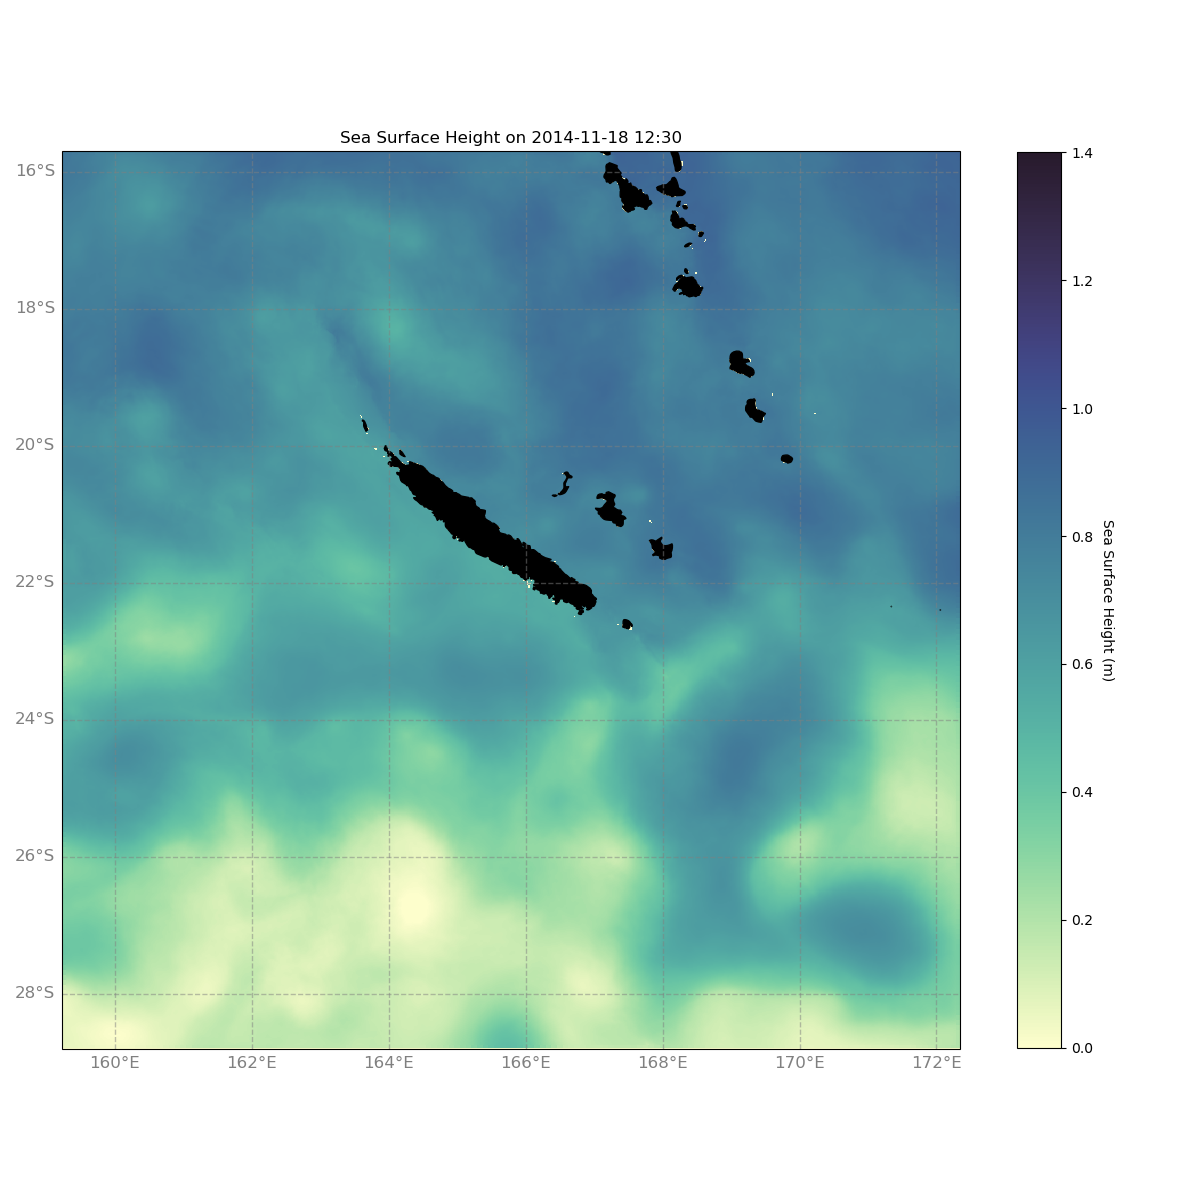

In [3]:
# Assuming SSH is your dataset and it's already loaded
# Define the geographic domain
lon_min, lon_max = 159.23333740234375, 172.34999084472656
lat_min, lat_max = -28.803945541381836, -15.699763298034668

# Extract latitude and longitude coordinates
lat = SSH['nav_lat']
lon = SSH['nav_lon']

# Define fixed colorbar values
colorbar_min = 0  # Set your desired minimum value here
colorbar_max = 1.4   # Set your desired maximum value here

# Define beginning and end dates for the plots, including time REMEMBER: DATA EACH HOUR
start_date_str = '2014-11-18 09:30'  # Adjust this to your start date and time
end_date_str = '2014-12-31 23:30'    # Adjust this to your end date and time

# Initial frame counter
initial_frame_counter = 7713  # Set your desired starting frame counter here (e.g., 0000)

# Convert string dates to datetime objects, accounting for time
start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M')

# Find indices for start and end dates
# Convert your time_counter to a list of datetime objects for comparison
time_counter_datetimes = [datetime.strptime(date, '%Y-%m-%d %H:%M') for date in SSH['time_counter'].dt.strftime('%Y-%m-%d %H:%M').values]
start_index = next(i for i, date in enumerate(time_counter_datetimes) if date >= start_date)
end_index = next(i for i, date in enumerate(time_counter_datetimes) if date >= end_date)


for i in range(start_index, end_index + 1):
    # Extract the sea surface height (SSH) for the specific date and time
    specific_ssh = SSH['zos'].isel(time_counter=i)
    # Format the title with the correct date and time
    date_str = SSH['time_counter'][i].dt.strftime('%Y-%m-%d %H:%M').values.astype(str)
    
    # Create a plot with the specified projection
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=1)
    ssh_pcolormesh = ax.pcolormesh(lon, lat, specific_ssh, cmap=cmocean.cm.deep, vmin=colorbar_min, vmax=colorbar_max, zorder=0, transform=ccrs.PlateCarree())
    
    # Create a colorbar with the fixed range
    cbar = fig.colorbar(ssh_pcolormesh, ax=ax, label='Sea Surface Height (m)', shrink=0.765)
    cbar.set_label('Sea Surface Height (m)', rotation=270, labelpad=15)
    
    # Set title with the formatted date and time
    ax.set_title(f'Sea Surface Height on {date_str}')
    
    # Add gridlines with labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}
    
    plt.tight_layout()
    
    # Adjust the save path to incorporate the initial frame counter
    plt.savefig(f'/bettik/PROJECTS/pr-data-ocean/riverama/frames/SSH/frame_{initial_frame_counter + i - start_index:04d}.png')
    plt.close(fig)  # Close the figure to free memory


For downlading files locally from dahu:
- select the download directory where you want the files locally ###

``
cd Downloads
``

- Connect to the Remote Server via SFTP ###
  
``
sftp riverama@dahu
``

- Navigate to the File's Directory (if necessary)

``
cd /bettik/PROJECTS/pr-data-ocean/riverama/CALEDO60/
``

- Download the File


``
mget *.png
``

- Exit SFTP

``
exit
``

Luego de que se tengan todas las imagenes, es necesario ejecutar la siguiente linea:

``
./images2mp4.sh -i /Users/marraqueta/Documents/climporn-master/Frames/IT_Modes/frame_ -t png -f 4 -h 1200 -D /Users/marraqueta/Documents/climporn-master/ffmpeg

``

./images2mp4.sh -i /Users/marraqueta/Documents/climporn-master/DAC/frame_ -t png -f 4 -h 1200 -D /Users/marraqueta/Documents/climporn-master/ffmpeg

en cd donde este ffmpeg en la carpeta de climporn.

### SSH + Speed Vectors

: 